In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

In [4]:
fLexFilms4="/Users/gilles/Downloads/Lexique4_min+filtr+cat+separ+corr3.tsv"

In [5]:
dfLexFilms4=pd.read_csv(filepath_or_buffer=fLexFilms4,sep="\t",header=None,skip_blank_lines=True,encoding="utf8")
dfLexFilms4.columns="graphie lemme cat infover genre nombre occurrences".split(" ")

In [6]:
dfLex4=dfLexFilms4.sort_values(["lemme","cat"]).reset_index().drop(columns="index")

In [8]:
dfLex4["rangFW"]=dfLex4["occurrences"].rank(ascending=False)
dfLex4=dfLex4[dfLex4["cat"].notnull()].sort_values("rangFW").reset_index().drop(columns="index")
dfLex4.head()

,graphie,lemme,cat,infover,genre,nombre,occurrences,rangFW
0,de,de,PRE,NaN,NaN,NaN,8309303.0,1.0
1,je,je,PRO:per,NaN,NaN,s,8027518.0,2.0
2,est,être,VER,ind:pre:3,NaN,s,6080693.0,3.0
3,pas,pas,ADV,NaN,NaN,NaN,5701766.0,4.0
4,la,la,ART:def,NaN,f,s,4396181.0,5.0


# Comparaison de la distribution des fréquences avec Zipf

In [9]:
#
# Adapted from
# https://stackoverflow.com/questions/43837179/best-fit-line-on-log-log-scales-in-python-2-7/43838500
#
def plotZipf(lDF,rankColumn,graphLabel=u"Formes dans Films",lQuartiles=["All"]):
    fig=plt.figure()
    ax = fig.add_subplot(111)

    lRang=lDF[rankColumn]
    lOccurrences=lDF["occurrences"]

    logOccurrences=np.log(lOccurrences)
    logRang=np.log(lRang)
    lQuart=len(logRang)/4

    mAll, cAll = np.polyfit(logRang, logOccurrences, 1)
    yZipfGen = np.exp(mAll*logRang + cAll)
    mQ1, cQ1 = np.polyfit(logRang[:lQuart], logOccurrences[:lQuart], 1)
    yZipfQ1 = np.exp(mQ1*logRang + cQ1)
    mQ2, cQ2 = np.polyfit(logRang[lQuart:2*lQuart], logOccurrences[lQuart:2*lQuart], 1)
    yZipfQ2 = np.exp(mQ2*logRang + cQ2)
    mQ3, cQ3 = np.polyfit(logRang[2*lQuart:3*lQuart], logOccurrences[2*lQuart:3*lQuart], 1)
    yZipfQ3 = np.exp(mQ3*logRang + cQ3)
    mQ4, cQ4 = np.polyfit(logRang[3*lQuart:], logOccurrences[3*lQuart:], 1)
    yZipfQ4 = np.exp(mQ4*logRang + cQ4)
    
    print u"Coefficient général %0.2f\n\tQ1 %0.2f\n\tQ2 %0.2f\n\tQ3 %0.2f\n\tQ4 %0.2f"%(mAll, mQ1, mQ2, mQ3, mQ4)

    plt.plot(lRang, lOccurrences)
    if "All" in lQuartiles:
        plt.plot(lRang, yZipfGen,":")
    if "Q1" in lQuartiles:
        plt.plot(lRang, yZipfQ1, ':')
    if "Q2" in lQuartiles:
        plt.plot(lRang, yZipfQ2, ':')
    if "Q3" in lQuartiles:
        plt.plot(lRang, yZipfQ3, ':')
    if "Q4" in lQuartiles:
        plt.plot(lRang, yZipfQ4, ':')

    ax.set_yscale('log')
    ax.set_xscale('log')
    #slope, intercept = np.polyfit(logA, logB, 1)
    plt.xlabel("Rang")
    plt.ylabel("Occurrences")
    ax.set_title(graphLabel)
    plt.show()

## Comparaison de l'ensemble du lexique
le coefficient de Zipf varie du simple au double entre le premier quartile 1.56 et le dernier 3.70

Coefficient général -2.26
	Q1 -1.56
	Q2 -2.75
	Q3 -3.52
	Q4 -3.70


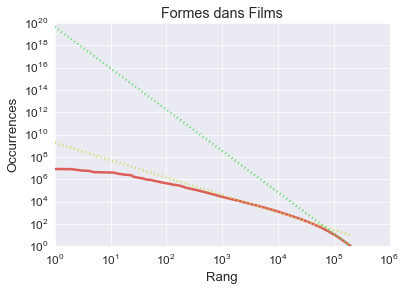

In [10]:
plotZipf(dfLex4,"rangFW",lQuartiles="Q1 Q4".split(" "))

## Comparaisons par catégories

In [11]:
dfL4={}

catV=["VER","AUX"]
dfVerbes4=dfLex4.loc[dfLex4["cat"].isin(catV),:]
dfVerbes4.loc[dfVerbes4["cat"].isin(catV),"rangFWV"]=dfVerbes4.loc[dfVerbes4["cat"].isin(catV),"occurrences"].rank(ascending=False)
dfL4["V"]=dfVerbes4.sort_values("rangFWV").reset_index().drop(columns="index")

dfNoms4=dfLex4.loc[dfLex4["cat"]=="NOM",:]
dfNoms4.loc[dfNoms4["cat"]=="NOM","rangFWN"]=dfNoms4.loc[dfNoms4["cat"]=="NOM","occurrences"].rank(ascending=False)
dfL4["N"]=dfNoms4.sort_values("rangFWN").reset_index().drop(columns="index")

dfAdjectifs4=dfLex4.loc[dfLex4["cat"]=="ADJ",:]
dfAdjectifs4.loc[dfAdjectifs4["cat"]=="ADJ","rangFWA"]=dfAdjectifs4.loc[dfAdjectifs4["cat"]=="ADJ","occurrences"].rank(ascending=False)
dfL4["A"]=dfAdjectifs4.sort_values("rangFWA").reset_index().drop(columns="index")

for cat in "VNA":
    print cat
    display(dfL4[cat].head())

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


V


,graphie,lemme,cat,infover,genre,nombre,occurrences,rangFW,rangFWV
0,est,être,VER,ind:pre:3,NaN,s,6080693.0,3.0,1.0
1,a,avoir,AUX,ind:pre:3,NaN,s,2139655.0,24.0,2.0
2,ai,avoir,AUX,ind:pre:1,NaN,s,1641324.0,26.0,3.0
3,a,avoir,VER,ind:pre:3,NaN,s,1528403.0,28.0,4.0
4,est,être,AUX,ind:pre:3,NaN,s,1030580.0,41.0,5.0


N


,graphie,lemme,cat,infover,genre,nombre,occurrences,rangFW,rangFWN
0,chose,chose,NOM,NaN,f,s,494041.0,87.0,1.0
1,temps,temps,NOM,NaN,m,NaN,354682.0,122.0,2.0
2,besoin,besoin,NOM,NaN,m,s,332955.0,131.0,3.0
3,accord,accord,NOM,NaN,m,s,307708.0,144.0,4.0
4,vie,vie,NOM,NaN,f,s,303952.0,145.0,5.0


A


,graphie,lemme,cat,infover,genre,nombre,occurrences,rangFW,rangFWA
0,juste,juste,ADJ,NaN,NaN,s,323706.0,139.0,1.0
1,bon,bon,ADJ,NaN,m,s,297776.0,153.0,2.0
2,tout,tout,ADJ,NaN,m,s,286396.0,160.0,3.0
3,tous,tout,ADJ,NaN,m,p,282537.0,162.0,4.0
4,sûr,sûr,ADJ,NaN,m,s,267518.0,171.0,5.0


On peut calculer le ratio entre le coefficient du premier quartile et celui du quatrième.
- pour les verbes, Q4/Q1=2.05
- pour les noms, Q4/Q1=3.03
- pour les adjectifs, Q4/Q1=3.48

V
Coefficient général -2.14
	Q1 -1.55
	Q2 -2.57
	Q3 -3.11
	Q4 -3.17


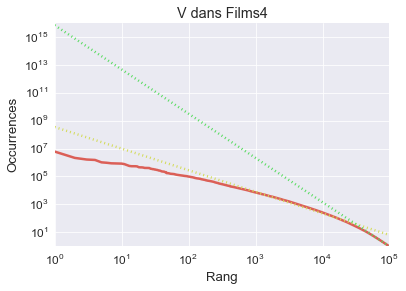

N
Coefficient général -2.36
	Q1 -1.41
	Q2 -3.08
	Q3 -3.97
	Q4 -4.27


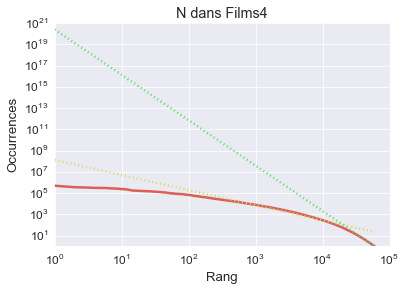

A
Coefficient général -2.04
	Q1 -1.28
	Q2 -2.47
	Q3 -3.61
	Q4 -4.45


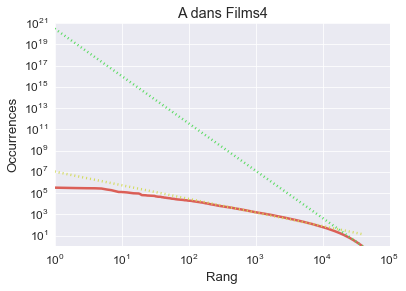

In [12]:
for cat in "VNA":
    print cat
    plotZipf(dfL4[cat],"rangFW%s"%cat,graphLabel="%s dans Films4"%cat,lQuartiles="Q1 Q4".split(" "))

# Statistiques sur les cases du paradigme morphosyntaxique

## Filtrer les scories de Lexique4
- quelques formes fléchies sont notées avec des lemmes qui ne correspondent pas à un verbe
- quelques formes ne sont pas identifiées : infover = NaN
- une forme est indiquée comme impératif 3S

Dans tous les cas, on remplace l'étiquette de Lexique.org par l'étiquette Grace

In [36]:
dfL4["V"].infover.unique()

array([u'ind:pre:3', u'ind:pre:1', u'inf;', u'ind:imp:3', u'ind:pre:2',
       u'par:pas:', u'imp:pre:2', u'inf', u'ind:imp:1', u'ind:fut:3',
       u'cnd:pre:3', u'sub:pre:3', u'imp:pre:1', u'cnd:pre:1', nan,
       u'cnd:pre:2', u'ind:imp:2', u'ind:fut:1', u'par:p', u'ind:fut:2',
       u'sub:pre:2', u'ind:pas:3', u'sub:pre:1', u'ind:pas:1',
       u'ind:pas:2', u'imp:pre:2p;ind:pre:2p;par:pas;',
       u'imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:3s;',
       u'imp:pre:1p;ind:pre:1p;', u'sub:imp:3', u'ind:pas:3s;',
       u'sub:imp:1', u'imp:pre:3', u'sub:imp:2'], dtype=object)

In [114]:
def infover2Case(lRow):
    result=""
    lInfover=lRow["infover"]
    lNombre=lRow["nombre"]
    if isinstance(lInfover,unicode):
        if lInfover in [u'imp:pre:2p;ind:pre:2p;par:pas;',
       u'imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:3s;',
       u'imp:pre:1p;ind:pre:1p;']:
            print lRow["graphie"],lRow["lemme"]
        else:
            if lInfover[:3]==u"inf":
                result=u"inf"
            elif lInfover==u"par:p":
                result="pP"
            elif lInfover[:8]==u"par:pas:":
                if lNombre in ["s","p"]:
                    lNombre=lNombre.upper()
                else:
                    print lRow
                lGenre=lRow["genre"]
                if lGenre in ["m","f"]:
                    lGenre=lGenre.upper()
                else:
                    print lRow
                result="pp"+lGenre+lNombre
            else:
                if lNombre in ["s","p"]:
                    lNombre=lNombre.upper()
                    if lInfover[:8]==u"ind:pre:":
                        result="pi"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:imp:":
                        result="ii"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:fut:":
                        result="fi"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:pas:":
                        result="ai"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"imp:pre:":
                        result="pI"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"sub:pre:":
                        result="ps"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"sub:imp:":
                        result="is"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"cnd:pre:":
                        result="pc"+lInfover[8]+lNombre
                else:
                    print lRow               
    return result

print "Problèmes de lemme"
dfL4["V"]["case"]=dfL4["V"].apply(infover2Case,axis=1)

Problèmes de lemme
faîtes faîte
monte monte
partons parton
monte monte
monte monte
excitons exciton
transposons transposon


### exporter les erreurs de Lexique4-Verbes pour correction
- lexèmes sans case
- lexèmes avec une forme d'impératif 3SG

In [116]:
dfL4ErrorsV=dfL4["V"][dfL4["V"]["case"].isin(["","pI3S"])]
dfL4ErrorsV.to_csv(path_or_buf="PB-Lex4-Verbes.csv",sep="\t",encoding="utf8")

### aggréger les comptes des formes artificiellement séparées par Lexique4
- groupby graphie, lemme, case
 - AUX et VER ensemble pour un même lemme
 - les infover inf et inf; sont regroupés via la case inf
- recalcul du rang après regroupements

In [117]:
dfL4["VFiltre"]=dfL4["V"][~dfL4["V"]["case"].isin(["","pI3S"])]
dfL4["VFiltre"]=dfL4["VFiltre"].groupby("graphie lemme case".split(" "))[["occurrences"]].sum().reset_index()
dfL4["VFiltre"]["rangFWV"]=dfL4["VFiltre"]["occurrences"].rank(ascending=False)
dfL4["VFiltre"].sort_values("rangFWV")

,graphie,lemme,case,occurrences,rangFWV
42094,est,être,pi3S,7111273.0,1.0
2,a,avoir,pi3S,3668058.0,2.0
3304,ai,avoir,pi1S,2407163.0,3.0
6631,as,avoir,pi2S,1021787.0,4.0
105195,était,être,ii3S,982148.0,5.0
43914,faire,faire,inf,959183.0,6.0
99668,va,aller,pi3S,878202.0,7.0
88371,sais,savoir,pi1S,862224.0,8.0
93048,suis,suivre,pi1S,834976.0,9.0
106254,être,être,inf,715572.0,10.0


In [118]:
dfCasesTokens=dfL4["VFiltre"][dfL4["VFiltre"]["case"]!=""].groupby("case")[["occurrences"]].sum().sort_values("occurrences",ascending=False)
dfCasesTypes=dfL4["VFiltre"][dfL4["VFiltre"]["case"]!=""].groupby("case")[["occurrences"]].count().sort_values("occurrences",ascending=False)
display(dfCasesTokens.head(),dfCasesTypes.head())

,occurrences
case,
pi3S,17617887.0
inf,11917396.0
pi1S,9144293.0
ppMS,7704344.0
pi2S,4043374.0


,occurrences
case,
inf,5575
pi3S,5246
ppMS,5232
ii3S,4136
ppFS,4129


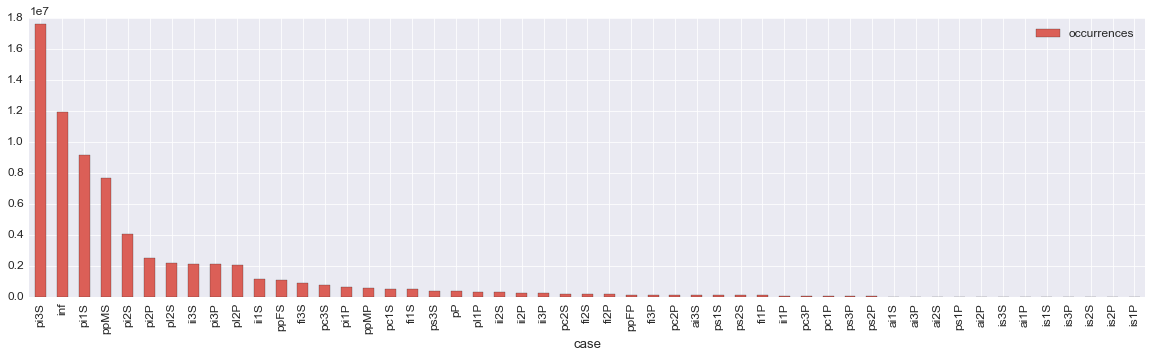

In [111]:
ax=dfCasesTokens.plot(kind="bar",figsize=(20,5))
#ax.set_yscale('log')


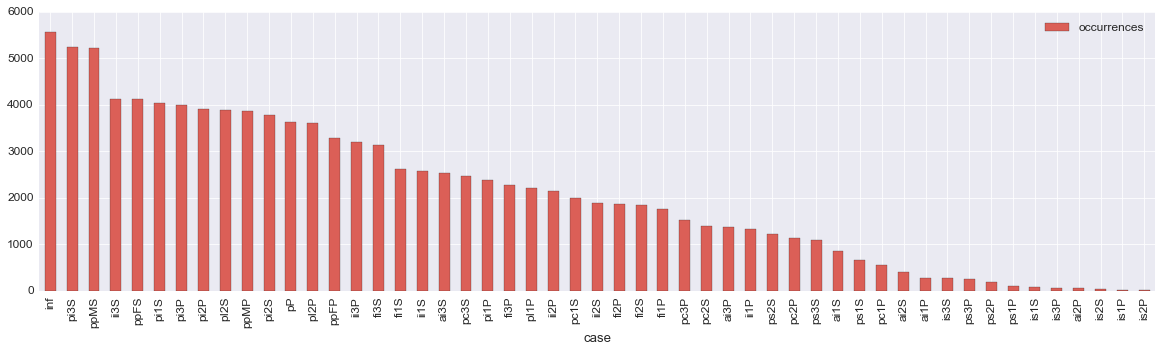

In [113]:
dfCasesTypes.plot(kind="bar",figsize=(20,5))

# Statistiques sur les lexèmes

## Fréquence des lexèmes

In [121]:
dfL4LexV=dfL4["VFiltre"].groupby("lemme")[["occurrences"]].sum()

In [129]:
dfL4LexV["rangFLV"]=dfL4LexV["occurrences"].rank(ascending=False)
dfL4LexV=dfL4LexV.sort_values("rangFLV").reset_index()

In [135]:
dfL4LexV.head(25)

,lemme,occurrences,rangFLV
0,être,12886968.0,1.0
1,avoir,10340928.0,2.0
2,aller,3091353.0,3.0
3,faire,2860037.0,4.0
4,pouvoir,1978448.0,5.0
5,dire,1924910.0,6.0
6,vouloir,1653646.0,7.0
7,savoir,1569328.0,8.0
8,devoir,1209207.0,9.0
9,voir,1160961.0,10.0


Coefficient général -2.70
	Q1 -1.49
	Q2 -2.74
	Q3 -5.52
	Q4 -10.28


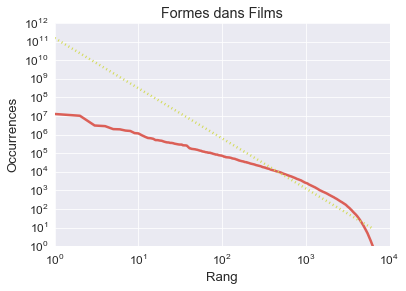

In [133]:
plotZipf(dfL4LexV,"rangFLV",lQuartiles="All")

## Nombre de formes des lexèmes

In [146]:
dfL4["VFiltre"]["nb"]=1

### Lexèmes avec plus de 51 formes
Pour les lexèmes sujets à surabondance, il est possible d'avoir plus de 51 formes listées mais une partie des lexèmes de la liste ne font pas partie des surabondants.

In [157]:
dfL4LexFormesV=dfL4["VFiltre"].groupby("lemme")[["occurrences","nb"]].count()
dfL4LexFormesV[dfL4LexFormesV["occurrences"]>51].index.tolist()

[u'aimer',
 u'aller',
 u'appeler',
 u'asseoir',
 u'avoir',
 u'devoir',
 u'donner',
 u'effrayer',
 u'envoyer',
 u'essayer',
 u'laisser',
 u'payer',
 u'penser',
 u'porter',
 u'pouvoir',
 u'savoir',
 u'trouver',
 u'vouloir',
 u'\xeatre']

In [150]:
dfDistNbFormes=dfL4LexFormesV.groupby("occurrences")["nb"].count()
dfDistNbFormes

occurrences
1     667
2     415
3     313
4     263
5     266
6     216
7     199
8     190
9     171
10    176
11    164
12    142
13    149
14    122
15    133
16    158
17    135
18    130
19    136
20    120
21    103
22    137
23    123
24    103
25    122
26    114
27    100
28     94
29     89
30     88
     ... 
32     95
33    104
34     90
35     85
36     99
37     97
38     86
39     80
40     64
41     57
42     60
43     50
44     42
45     29
46     13
47     14
48     13
49      9
50      7
51      4
52      3
54      4
55      1
56      3
57      1
58      2
59      1
63      1
68      2
73      1
Name: nb, Length: 61, dtype: int64